### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


as we notice that we have a missing values in 3 features

In [4]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
data.Potability.value_counts()


0    1998
1    1278
Name: Potability, dtype: int64

In [6]:
data= data.dropna()

In [7]:
data.Potability.value_counts()


0    1200
1     811
Name: Potability, dtype: int64

#### Not potable is much more potable(1200 > 811) so we need to balance the data to prevent  bias.


In [8]:
notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]  

from sklearn.utils import resample
df_minority_upsampled = resample(potable, replace = True, n_samples = 1200) 

from sklearn.utils import shuffle
data = pd.concat([notpotable, df_minority_upsampled])
data = shuffle(data) 


In [9]:
data.shape

(2400, 10)

In [10]:
data.Potability.value_counts()


0    1200
1    1200
Name: Potability, dtype: int64

## 2. EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

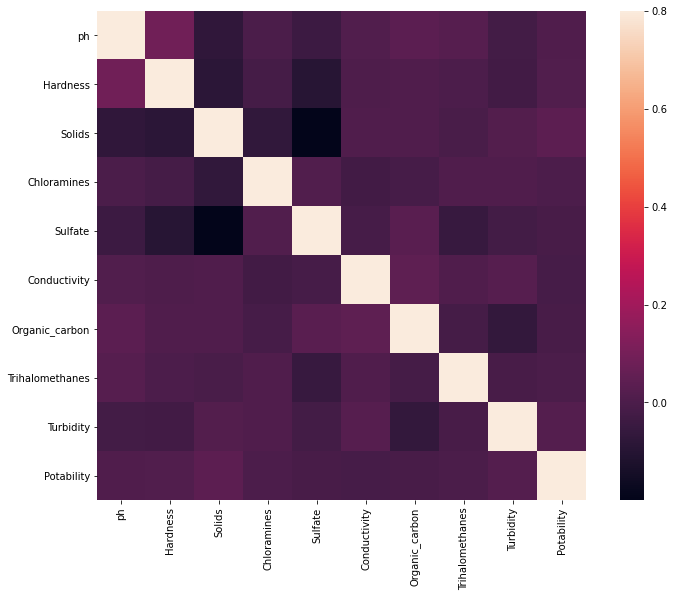

In [12]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)


<AxesSubplot:>

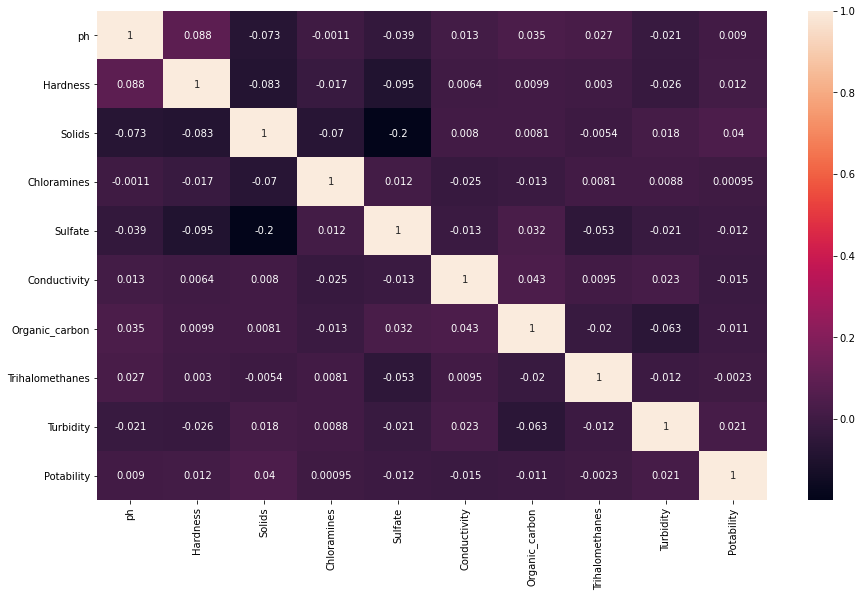

In [13]:
plt.figure(figsize = (15,9))
sns.heatmap(data.corr(), annot = True)


In [14]:
corr = data.corr()
corr["Potability"].sort_values(ascending=False)


Potability         1.000000
Solids             0.039645
Turbidity          0.021262
Hardness           0.012196
ph                 0.008969
Chloramines        0.000951
Trihalomethanes   -0.002284
Organic_carbon    -0.010584
Sulfate           -0.011764
Conductivity      -0.014906
Name: Potability, dtype: float64

Solids have the highest correlation.

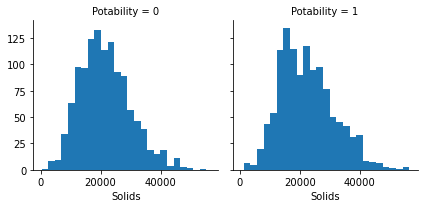

In [15]:
g = sns.FacetGrid(data, col='Potability')
g.map(plt.hist, 'Solids', bins=25)


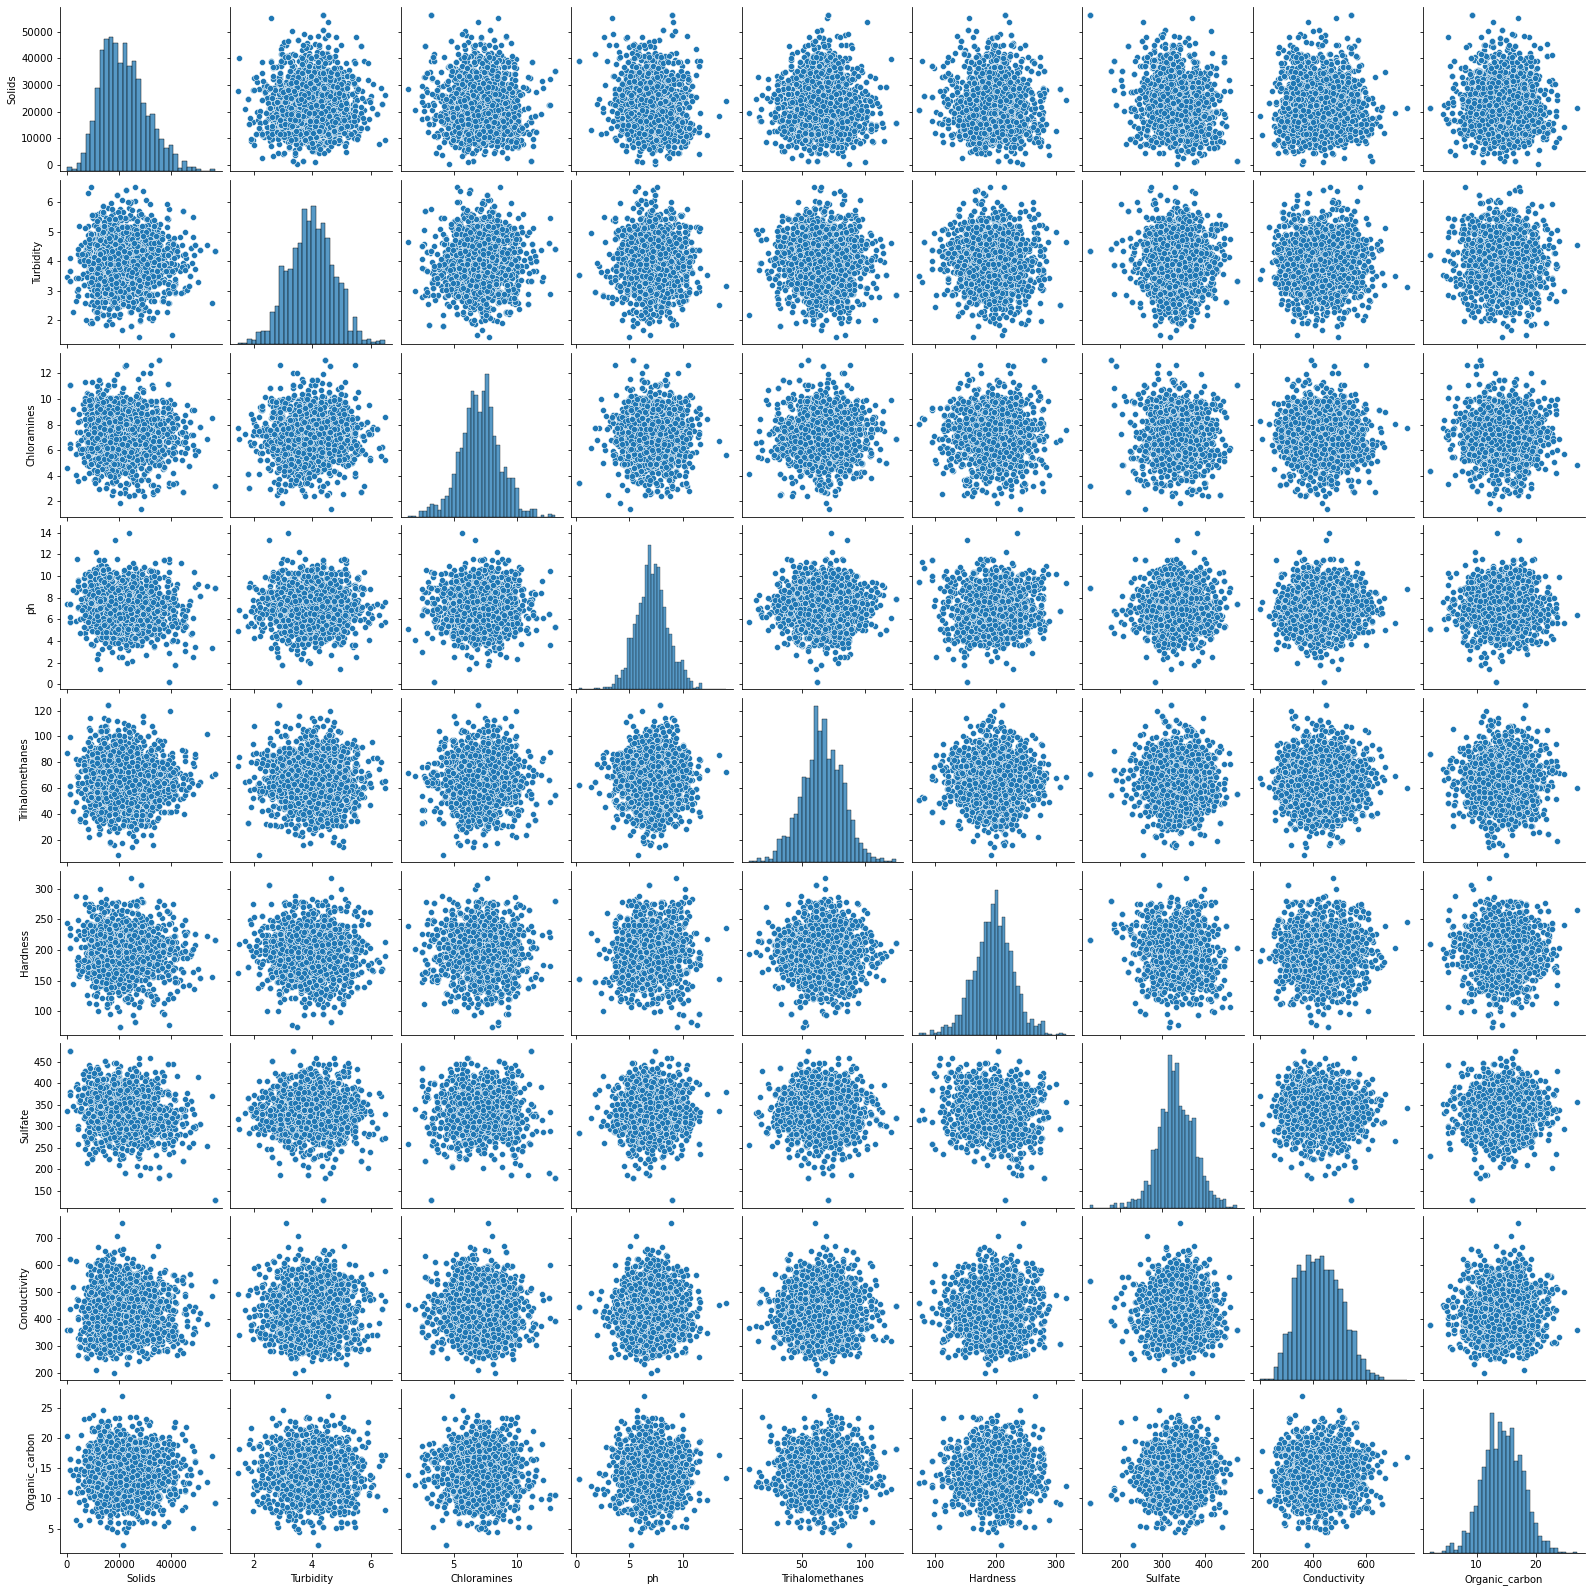

In [16]:
cols = ['Solids', 'Turbidity', 'Chloramines', 'ph','Trihalomethanes','Hardness','Sulfate'
        ,'Conductivity','Organic_carbon']
sns.pairplot(data[cols])


## 3. Apply ML algorithms 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score


In [18]:
x = data.drop(['Potability'], axis = 1)
y = data['Potability']


#### Applying StandardScaler befor fitting ML model to normalize the features.

In [19]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
col= x.columns
x[col] = st.fit_transform(x[col])
x[col]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2153,-0.803437,-1.177329,-0.670442,1.449761,-1.292953,1.540444,-0.754804,-0.860070,1.376063
1798,-0.397223,1.231182,-1.630179,1.686090,-2.757319,-0.871254,0.014361,-0.712933,-1.418375
167,1.010482,0.157728,0.511911,-0.087456,0.442712,-1.448258,0.998329,0.148936,1.648864
291,0.408066,-0.442187,-1.755830,-1.061194,1.331593,1.119142,0.800377,-0.491651,0.404934
2439,0.527787,-0.846011,0.768032,1.377849,0.481471,1.133486,-0.717776,0.836994,0.536183
...,...,...,...,...,...,...,...,...,...
1872,-0.611623,-1.363693,-0.161090,0.851054,1.182084,-0.780771,-0.197124,1.864711,0.935676
429,-0.077189,0.830880,1.038742,-2.108580,0.245868,1.292591,-0.208689,0.257718,-0.670521
1173,-0.492737,0.424864,-1.171895,-0.086636,-0.498147,-0.627125,-0.723630,-0.201648,0.742599
2102,1.264215,-1.226742,0.332488,0.327589,1.933644,-1.040528,-0.231656,-0.229818,-0.441430


#### Now data is ready to split.

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1)


In [21]:
knn = KNeighborsClassifier()

dt = DecisionTreeClassifier()

rf = RandomForestClassifier()

ada = AdaBoostClassifier()

xgb =XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)


para_knn = {'n_neighbors':np.arange(1, 50)}  #parameters of knn
grid_knn = GridSearchCV(knn, param_grid=para_knn, cv=5) #search knn for 5 fold cross validation

#Decision Tree
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,30,40,80,100]}
grid_dt = GridSearchCV(dt, param_grid=para_dt, cv=5) #grid search decision tree for 5 fold cv
params_rf = {'n_estimators':[100,200, 350, 500], 'min_samples_leaf':[2, 10, 30]}
grid_rf = GridSearchCV(rf, param_grid=params_rf, cv=5)

#AdaBoost
params_ada = {'n_estimators': [50,100,250,400,500,600], 'learning_rate': [0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5)

#XGBoost
params_xgb = {'n_estimators': [50,100,250,400,600,800,1000], 'learning_rate': [0.2,0.5,0.8,1]}
rs_xgb =  RandomizedSearchCV(xgb, param_distributions=params_xgb, cv=5)


In [22]:
grid_knn.fit(X_train, Y_train)
grid_dt.fit(X_train, Y_train)
grid_rf.fit(X_train, Y_train)
grid_ada.fit(X_train, Y_train)
rs_xgb.fit(X_train, Y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)


Best parameters for KNN: {'n_neighbors': 1}
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 1}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 350}
Best parameters for AdaBoost: {'learning_rate': 0.8, 'n_estimators': 600}
Best parameters for XGBoost: {'n_estimators': 800, 'learning_rate': 0.2}


In [23]:
models = [('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
          ('XGBoost', xgb)]


for model_name, model in models:
 
    model.fit(X_train, Y_train)    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    print('{:s} : {:.2f}'.format(model_name, accuracy))


K Nearest Neighbours : 0.62
Decision Tree : 0.79
Random Forest : 0.83
AdaBoost : 0.60
XGBoost : 0.81


### Finally the best Model we can apply is RandomForest with accuracy 88%. 